# 1. Import Created Class

## 1.1 Created Four Python Script Module
   #### 1.1.1 readdataframe MODULE => To read the dataset
   #### 1.1.2 mytfidfvectorizer MODULE => For Feature Extraction
   #### 1.1.3 createviewmodel MODULE => To Train and Visualize Conventional Machine Learning Model
   #### 1.1.4 createmymodel MODULE => To Process Hybrid Machine Learning Model
   #### 1.1.5 comparemodels MODULE => To compare Various Models
## 1.2 Import all Classes from Module


In [7]:
from My_Module.readdataframe import ReadDataFrame
from My_Module.mytfidfvectorizer import MyTfidfVectorizer,SetLabel
from My_Module.createviewmodel import CreateModel
from My_Module.createmymodel import *
from My_Module.comparemodels import CompareModels

# 2. Read Dataset

In [8]:
#Reading Preprocessed dataset
df_obj = ReadDataFrame("df")
df_obj.set_df("PreprocessedDatasets/Final_Preprocessed_df123456.csv")
my_df = df_obj.get_df()
my_df.head(2)

,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7,preproc_step_8
0,0,not long to go till #bakugp have fun everybody...,"['not', 'long', 'to', 'go', 'till', 'bakugp', ...","['not', 'long', 'to', 'go', 'till', 'bakugp', ...","['not', 'long', 'to', 'go', 'till', 'bakugp', ...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...","['long', 'till', 'bakugp', 'fun', 'everybody',...",long till bakugp fun everybody race europegp
1,0,#pocohontas i hope she is picked as vp. it wil...,"['pocohontas', 'i', 'hope', 'she', 'is', 'pick...","['pocohontas', 'i', 'hope', 'she', 'is', 'pick...","['pocohontas', 'i', 'hope', 'she', 'is', 'pick...","['pocohontas', 'hope', 'picked', 'vp', 'happen...","['pocohontas', 'hope', 'picked', 'vp', 'happen...","['pocohontas', 'hope', 'picked', 'vp', 'happen...","['pocohonta', 'hope', 'pick', 'vp', 'happen', ...","['pocohonta', 'hope', 'pick', '', 'happen', 'l...",pocohonta hope pick happen lie heritage


# 3. Balance Dataset

Shape:  (7000, 11)


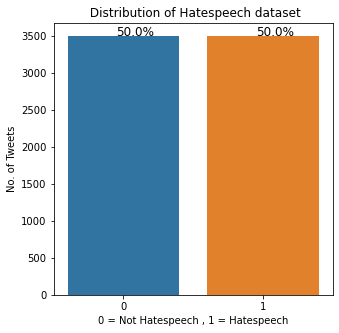

In [9]:
#Balance dataset
#print(my_df.groupby('label').count())
label0 =  my_df.loc[my_df.label==0][:3500]
label1 =  my_df.loc[my_df.label==1][:3500]
frames = [label0,label1]
df = pd.concat(frames)
from sklearn.utils import shuffle
my_df = shuffle(df)
my_df.reset_index(drop=True, inplace = True)
import seaborn as sns
import matplotlib.pyplot as plt

#function to show percentage 
def balance_df_view(df, x_axis):
    total = len(df)
    plt.rcParams["figure.figsize"] = (5,5)
    ax = sns.countplot( x= x_axis, data=df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.title(" Distribution of Hatespeech dataset")
    plt.xlabel('0 = Not Hatespeech , 1 = Hatespeech')
    plt.ylabel('No. of Tweets')
    plt.show()

print("Shape: ",df.shape)
balance_df_view(df, 'label')


In [10]:
print("0 => ", my_df[my_df.label==0].count())
print("1 => ",my_df[my_df.label==1].count())
my_df

0 =>  label              3500
tweet              3500
tokenized_tweet    3500
preproc_step_1     3500
preproc_step_2     3500
preproc_step_3     3500
preproc_step_4     3500
preproc_step_5     3500
preproc_step_6     3500
preproc_step_7     3500
preproc_step_8     3500
dtype: int64
1 =>  label              3500
tweet              3500
tokenized_tweet    3500
preproc_step_1     3500
preproc_step_2     3500
preproc_step_3     3500
preproc_step_4     3500
preproc_step_5     3500
preproc_step_6     3500
preproc_step_7     3500
preproc_step_8     3500
dtype: int64


,label,tweet,tokenized_tweet,preproc_step_1,preproc_step_2,preproc_step_3,preproc_step_4,preproc_step_5,preproc_step_6,preproc_step_7,preproc_step_8
0,1,These hoes really make me laugh lol,"['These', 'hoes', 'really', 'make', 'me', 'lau...","['these', 'hoes', 'really', 'make', 'me', 'lau...","['these', 'hoes', 'really', 'make', 'me', 'lau...","['hoes', 'laugh', 'lol']","['hoes', 'laugh', 'lol']","['hoes', 'laugh', 'lol']","['hoe', 'laugh', 'lol']","['hoe', 'laugh', 'lol']",hoe laugh lol
1,1,"@_wordtothewise I am hurt im.not in it wtf, fu...","['wordtothewise', 'I', 'am', 'hurt', 'im.not',...","['wordtothewise', 'i', 'am', 'hurt', 'im.not',...","['wordtothewise', 'i', 'am', 'hurt', 'im.not',...","['wordtothewise', 'hurt', 'im.not', 'wtf', 'fu...","['wordtothewise', 'hurt', 'im.not', 'wtf', 'fu...","['wordtothewise', 'hurt', 'imnot', 'wtf', 'fuc...","['wordtothewise', 'hurt', 'imnot', 'wtf', 'fuc...","['wordtothewise', 'hurt', 'imnot', 'wtf', 'fuc...",wordtothewise hurt imnot wtf fuck danielle bitch
2,1,Cruise's recent comments make him a bigger dou...,"['Cruise', ""'s"", 'recent', 'comments', 'make',...","['cruise', ""'s"", 'recent', 'comments', 'make',...","['cruise', ""'s"", 'recent', 'comments', 'make',...","['cruise', 'recent', 'comments', 'bigger', 'do...","['cruise', 'recent', 'comments', 'bigger', 'do...","['cruise', 'recent', 'comments', 'bigger', 'do...","['cruise', 'recent', 'comment', 'big', 'douche...","['cruise', 'recent', 'comment', 'big', 'douche...",cruise recent comment big douchebag charlie sh...
3,0,going to a conce a guy checks in goes through ...,"['going', 'to', 'a', 'conce', 'a', 'guy', 'che...","['going', 'to', 'a', 'conce', 'a', 'guy', 'che...","['going', 'to', 'a', 'conce', 'a', 'guy', 'che...","['going', 'conce', 'guy', 'checks', 'goes', 's...","['going', 'conce', 'guy', 'checks', 'goes', 's...","['going', 'conce', 'guy', 'checks', 'goes', 's...","['go', 'conce', 'guy', 'check', 'go', 'securit...","['', 'conce', 'guy', 'check', '', 'security', ...",conce guy check security gun wtf ripchristina...
4,0,"@user that, and you are old and washed up!","['user', 'that', 'and', 'you', 'are', 'old', '...","['user', 'that', 'and', 'you', 'are', 'old', '...","['user', 'that', 'and', 'you', 'are', 'old', '...","['user', 'old', 'washed']","['old', 'washed']","['old', 'washed']","['old', 'washed']","['old', 'washed']",old washed
...,...,...,...,...,...,...,...,...,...,...,...
6995,1,@oak_log check yer phone nigger,"['oak_log', 'check', 'yer', 'phone', 'nigger']","['oak_log', 'check', 'yer', 'phone', 'nigger']","['oak_log', 'check', 'yer', 'phone', 'nigger']","['oak_log', 'check', 'yer', 'phone', 'nigger']","['oak_log', 'check', 'yer', 'phone', 'nigger']","['oak log', 'check', 'yer', 'phone', 'nigger']","['oak', 'log', 'check', 'yer', 'phone', 'nigger']","['oak', 'log', 'check', 'yer', 'phone', 'nigger']",oak log check yer phone nigger
6996,1,Smoke good weed with bad bitch and give a good...,"['Smoke', 'good', 'weed', 'with', 'bad', 'bitc...","['smoke', 'good', 'weed', 'with', 'bad', 'bitc...","['smoke', 'good', 'weed', 'with', 'bad', 'bitc...","['smoke', 'good', 'weed', 'bad', 'bitch', 'goo...","['smoke', 'good', 'weed', 'bad', 'bitch', 'goo...","['smoke', 'good', 'weed', 'bad', 'bitch', 'goo...","['smoke', 'good', 'weed', 'bad', 'bitch', 'goo...","['smoke', 'good', 'weed', 'bad', 'bitch', 'goo...",smoke good weed bad bitch good girl bad habit
6997,0,"""happy friday eve"" i like this trending topic....","['happy', 'friday', 'eve', 'i', 'like', 'this'...","['happy', 'friday', 'eve', 'i', 'like', 'this'...","['happy', 'friday', 'eve', 'i', 'like', 'this'...","['happy', 'friday', 'eve', 'like', 'trending',...","['happy', 'friday', 'eve', 'like', 'trending',...","['happy', 'friday', 'eve', 'like', 'trending',...","['happy', 'friday', 'eve', 'like', 'trend', 't...","['happy', 'friday', 'eve', 'like', 'trend', 't...",happy friday eve like trend topic comeonfriday...
6998,0,follow your #hea and be â¤,"['follow', 'your', '

# Feature Extraction - Bag Of Words

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

def feat_ext_bag_of_words(df_tweet):
    count_vect = CountVectorizer(stop_words='english',min_df=1, max_features=3000, ngram_range=(1,2)) 
    #df_tweet1 = df_tweet.apply(TreebankWordDetokenizer().detokenize)
    bow_vec_matrix = count_vect.fit_transform(df_tweet.astype('U'))
    
    feature_names = count_vect.get_feature_names()
    print("Feature Length: ",len(sorted(feature_names)))
    #print(sorted(feature_names))
    print(len(sorted(feature_names)))
    return(bow_vec_matrix)
df_bow = feat_ext_bag_of_words(my_df['preproc_step_7'])
print(df_bow.toarray())
X1 = df_bow.toarray()
y1 = my_df['label'].to_numpy()
X1.shape

Feature Length:  3000
3000
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(6991, 3000)

# 4. Feature Extraction - TFIDF

In [6]:
#Creating X and y vector matrix using TFIDF vectorizer
tfidfVec = MyTfidfVectorizer(my_df,50000,(1,2))
label = SetLabel(my_df,50000)
X = tfidfVec.data
y = label.data
print(X.shape)
print(y.shape)
#tfidfVec.detail()

(6991, 1751)
(6991,)


# 5. Creating Classifier List

In [7]:
#creating a list of machine learning model to make Hybrid
classifier_list =[ LogisticRegression() ,KNeighborsClassifier() ,DecisionTreeClassifier(),RandomForestClassifier(),SVC(),BernoulliNB(),MultinomialNB(),AdaBoostClassifier(),MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)]
classifier_name_list=['LogisticRegression' ,'KNeighborsClassifier' ,'DecisionTreeClassifier','RandomForestClassifier','SupportVectorMachine','BernoulliNaiveBayes','MultinomialNaiveBayes','AdaBoostClassifier','MLPClassifier']

# 6.1.  Appling all ML algo with 10 K-Fold without parallel approach

In [ ]:

#--------------------------- With out Parallel processing -----------------------------------------------------------
#Creating Model and storing all model object into list
import warnings
warnings.filterwarnings('ignore')

import time
start = time.time()
ml_list = list()
for i, n, c in zip(range(len(classifier_list)),classifier_name_list,classifier_list):
    ml = 'ml'+str(i+1)
    print(ml, end= ' ')
    ml = CreateModel(X , y, c,n,5)
    ml_list.append(ml)

print(time.time()-start)

In [ ]:
#    -------------------------with out parallel processing ----------------------------------------------------------
#creating CompareModels() object
compare = CompareModels()
compare.compare_all(ml_list)


# 6. Appling all ML algo with 10 K-Fold using parallel approach

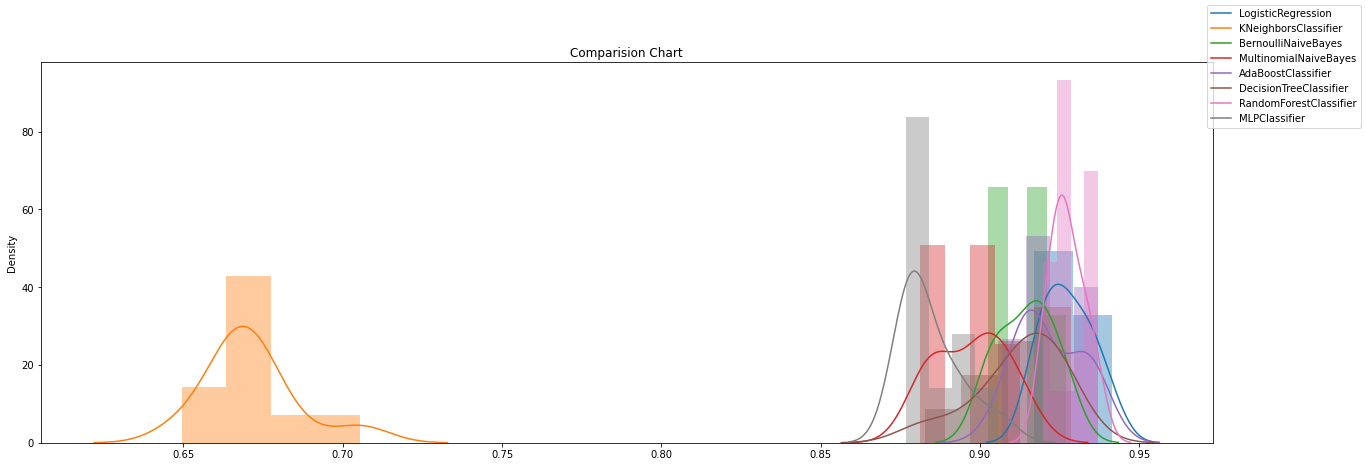

682.104150056839 seconds to complete all processes.


In [9]:
#-------------------------------- With Parallel processing ---------------------------------------------------
# Parallelizing using Pool.apply()
from IPython.display import clear_output
import multiprocessing as mp
import time
start_time = time.time()

pool = mp.Pool(mp.cpu_count())
compare = CompareModels()
models_result_list = []

def collect_result(result):
    global models_result_list
    if len(models_result_list) != 0:
        clear_output(wait=True)
        compare.compare_displot(models_result_list)
    models_result_list.append(result)

for n, c in zip(classifier_name_list,classifier_list):
    pool.apply_async(CreateModel, args=(X , y, c,n,10), callback=collect_result)


pool.close()  
pool.join() 
print("%s seconds to complete all processes." % (time.time() - start_time))

# 7. Visualize Model performance

In [ ]:
compare.compare_all(models_result_list)

# 8. Implementing My 2 Layer Algorithm Approach

In [10]:
# importing all desired machine learning algorithm to make an hybrid model
clsfrs = Import_classifiers()
clsfrs.set_multiple_classifers("lr","svm","rf","dt","nb","knn") #,"multi_nb" ,"ab","mlp"
#print(clsfrs.multiple_classifiers_list)

#Creating an Meta Classifier
meta_clsfr = Create_meta_classifier('lr')
#print(meta_clsfr.meta_classifier)

#Inserting clsfrs and meta_clsfr objects to create StackingClassifier()  object
my_model = CreateMyModel(clsfrs, meta_clsfr)

#Accessing StackingClassifier() variable.. Here (.model) is variable storing StackingClassifier() object
my_model = my_model.model

#createViewModel (Module) => CreateModel() (Class)
#fiting model with X and Y
my_ml = CreateModel(X1,y1,my_model,"my_model",10)

#appending the final model to list above created, to comparision with other classifiers
models_result_list .append(my_ml)

# 10. Visualizing - Comaprision My model to other traditional models

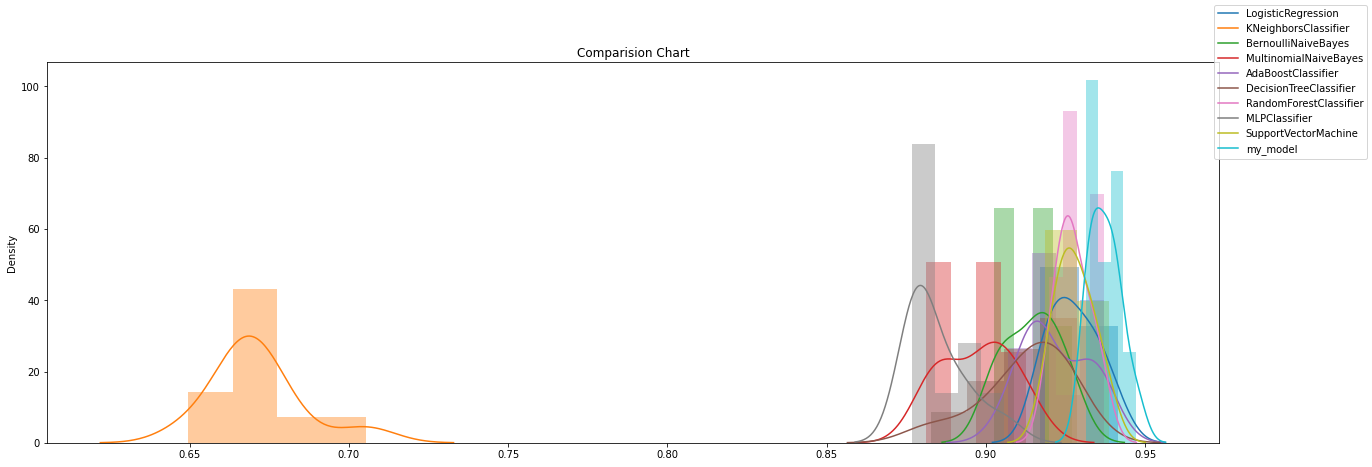

In [11]:
# Creating compare object
#compare = CompareModels()
compare.compare_displot(models_result_list)

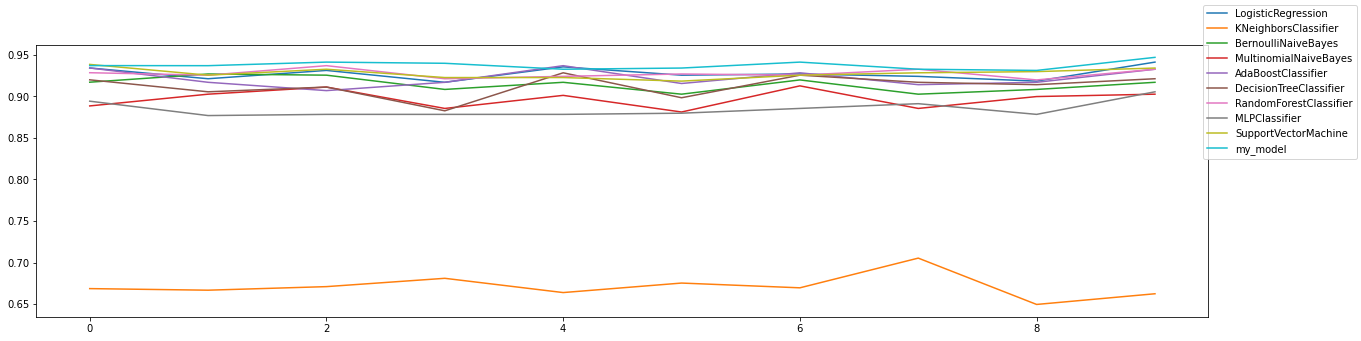

In [12]:
compare.compare_plot(models_result_list)

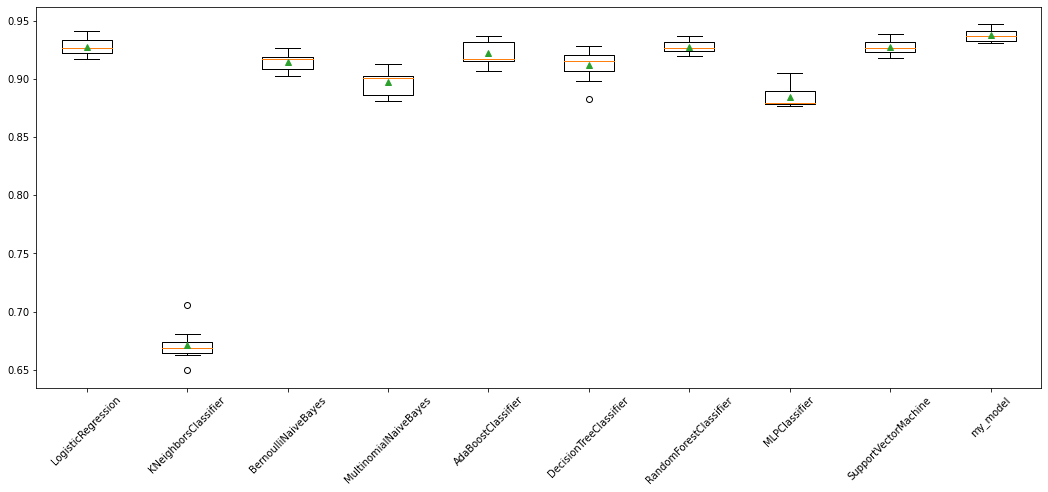

In [13]:
compare.compare_boxplot(models_result_list)

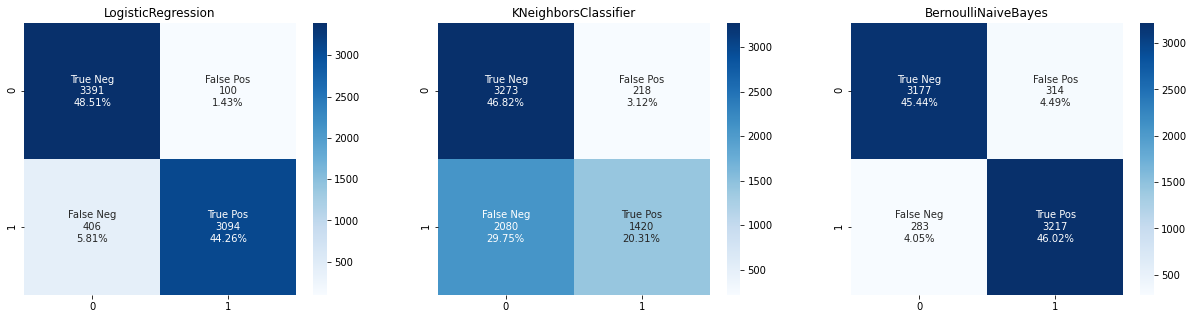

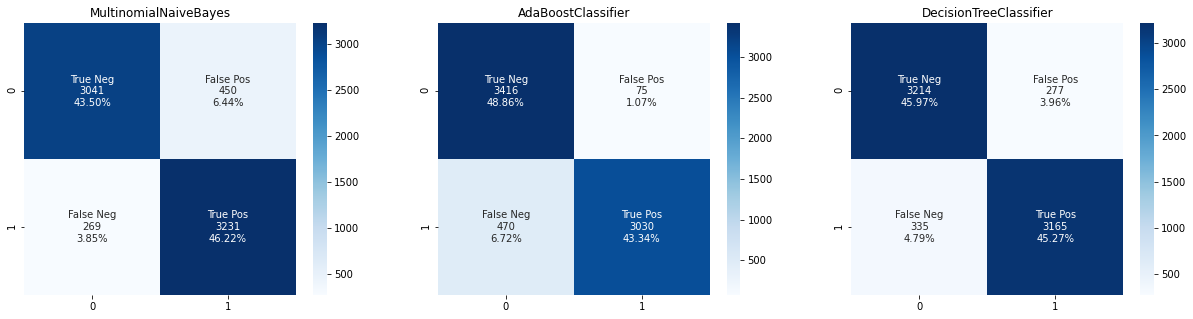

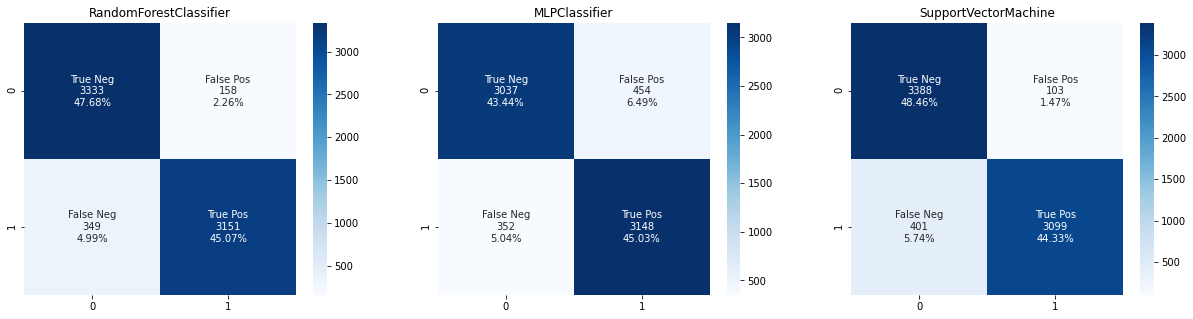

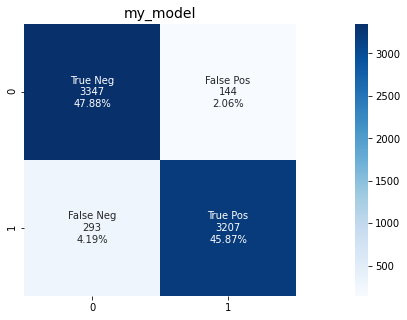

In [14]:
#It displays in one row only, so break the list to make clear list of confusion matrix
compare.compare_confusion_matrix(models_result_list[0:3])
compare.compare_confusion_matrix(models_result_list[3:6])
compare.compare_confusion_matrix(models_result_list[6:9])
compare.compare_confusion_matrix(models_result_list[9])

# Table view of My model's Performance

In [15]:
compare.compare_measures(models_result_list)

╒════╤════════════════════════╤═════════════════╤══════════════╤════════════════╤═══════════════╕
│    │ Model_Name             │   Precision (%) │   Recall (%) │   Accuracy (%) │   F_score (%) │
╞════╪════════════════════════╪═════════════════╪══════════════╪════════════════╪═══════════════╡
│  0 │ LogisticRegression     │         96.8691 │      88.4    │        92.7621 │       92.441  │
├────┼────────────────────────┼─────────────────┼──────────────┼────────────────┼───────────────┤
│  1 │ KNeighborsClassifier   │         86.6911 │      40.5714 │        67.1292 │       55.2744 │
├────┼────────────────────────┼─────────────────┼──────────────┼────────────────┼───────────────┤
│  2 │ BernoulliNaiveBayes    │         91.1073 │      91.9143 │        91.4604 │       91.509  │
├────┼────────────────────────┼─────────────────┼──────────────┼────────────────┼───────────────┤
│  3 │ MultinomialNaiveBayes  │         87.7751 │      92.3143 │        89.7153 │       89.9875 │
├────┼──────────────

In [ ]:
mp.cpu_count()